<a href="https://colab.research.google.com/github/gabriellafadhila/MiniDatasetGabriella/blob/main/Tugas_1_Gabriella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MENGUPLOAD** **FILE**

In [5]:
from google.colab import files
import pandas as pd

In [6]:
# Mengunggah file
uploaded = files.upload()

Saving TittleSelection (1).csv to TittleSelection (1).csv


**MEMBACA FILE**

In [7]:
# Membaca file CSV (gunakan nama file yang telah diunggah)
file_name = list(uploaded.keys())[0]  # Ambil nama file yang diunggah
df = pd.read_csv(file_name)

In [8]:
# Menampilkan 5 baris pertama data
print(df.head())

  type_of_reference                                            authors  \
0              JOUR  Kanbar, Lara J., Mishra, Anagh, Osborn, Alexan...   
1              JOUR  Kazerouni, Ayaan M., Davis, James C., Basak, A...   
2              JOUR                                   Biao, Zhang Zong   
3              JOUR  Santos Vieira, Felipe Alexandre, Vinhas Santos...   
4              JOUR                     Ling, Jintao, Afzaal, Muhammad   

                                       primary_title title publication_year  \
0  Investigation of bias in the automated assessm...   NaN              NaN   
1  Fast and accurate incremental feedback for stu...   NaN              NaN   
2  Design and realization of data mining simulati...   NaN              NaN   
3  Social media data reveals multiple cultural se...   NaN              NaN   
4  Automatic question-answer pairs generation usi...   NaN              NaN   

   year                                           abstract  
0  2024  Objectives

**MULAI PRE PROCESSING**

In [9]:
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [10]:
# Download resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
# Load CSV file
df = pd.read_csv('/content/TittleSelection (1).csv')

In [12]:
df

,type_of_reference,authors,primary_title,title,publication_year,year,abstract
0,JOUR,"Kanbar, Lara J., Mishra, Anagh, Osborn, Alexan...",Investigation of bias in the automated assessm...,NaN,NaN,2024,Objectives Natural language processing and mac...
1,JOUR,"Kazerouni, Ayaan M., Davis, James C., Basak, A...",Fast and accurate incremental feedback for stu...,NaN,NaN,2021,As incorporating software testing into program...
2,JOUR,"Biao, Zhang Zong",Design and realization of data mining simulati...,NaN,NaN,2023,Data mining in education is steadily gaining m...
3,JOUR,"Santos Vieira, Felipe Alexandre, Vinhas Santos...",Social media data reveals multiple cultural se...,NaN,NaN,2021,Cultural ecosystem services (CES) are benefits...
4,JOUR,"Ling, Jintao, Afzaal, Muhammad",Automatic question-answer pairs generation usi...,NaN,NaN,2024,The process of manually generating question an...
...,...,...,...,...,...,...,...
208,JOUR,"Guzmán-Valdivia Gómez, Gilberto, Domínguez-Gon...",Estrategia didáctica con estudios de casos par...,NaN,NaN,2025,Resumen Introducción el razonamiento clínico s...
209,JOUR,"ElNaka, Abdelrahman, Nael, Omar, Afifi, Hadeel...",AraScore: Investigating Response-Based Arabic ...,NaN,NaN,2021,There are more than 80 million students in the...
210,JOUR,"Whitelock-Wainwright, Alexander, Laan, Nathan,...",Exploring student information problem solving ...,NaN,NaN,2020,For learners to be successful in an informatio...
211,JOUR,"Wilson, Joshua, Rodrigues, Jessica",Classification accuracy and efficiency of writ...,NaN,NaN,2020,The present study leveraged advances in automa...


**Proses Parsing**

In [16]:
# Pastikan kolom yang akan diproses benar (misalnya 'text')
text_column = 'primary_title'  # Ganti dengan nama kolom yang sesuai

def preprocess_text(text):
    if pd.isna(text):
        return ""

    text = text.lower()  # Lowercasing
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and special characters
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    return ' '.join(words)

In [17]:
# Apply preprocessing
df['primary_title'] = df[text_column].apply(preprocess_text)

In [18]:
print(df['primary_title'])

0      investigation bias automated assessment school...
1      fast accurate incremental feedback student sof...
2      design realization data mining simulation meth...
3      social medium data reveals multiple cultural s...
4      automatic questionanswer pair generation using...
                             ...                        
208    estrategia didctica con estudios de casos para...
209    arascore investigating responsebased arabic sh...
210    exploring student information problem solving ...
211    classification accuracy efficiency writing scr...
212    development arabic hqasbased asag consider ign...
Name: primary_title, Length: 213, dtype: object


**Proses Tokenisasi**

In [19]:
# Tokenisasi judul jurnal
df["tokens"] = df["primary_title"].apply(word_tokenize)

In [ ]:
print(df)

                                         primary_title  \
0    investigation bias automated assessment school...   
1    fast accurate incremental feedback student sof...   
2    design realization data mining simulation meth...   
3    social medium data reveals multiple cultural s...   
4    automatic questionanswer pair generation using...   
..                                                 ...   
208  estrategia didctica con estudios de casos para...   
209  arascore investigating responsebased arabic sh...   
210  exploring student information problem solving ...   
211  classification accuracy efficiency writing scr...   
212  development arabic hqasbased asag consider ign...   

                                                tokens  
0    [investigation, bias, automated, assessment, s...  
1    [fast, accurate, incremental, feedback, studen...  
2    [design, realization, data, mining, simulation...  
3    [social, medium, data, reveals, multiple, cult...  
4    [automatic, q

**STOPWORD**

In [20]:
# Tokenisasi dan penghapusan stopwords
def remove_stopwords(text):
    words = word_tokenize(text)
    return [word for word in words if word.lower() not in stop_words]

    df["tokens"] = df["primary_title"].apply(remove_stopwords)

In [21]:
print(df["tokens"])

0      [investigation, bias, automated, assessment, s...
1      [fast, accurate, incremental, feedback, studen...
2      [design, realization, data, mining, simulation...
3      [social, medium, data, reveals, multiple, cult...
4      [automatic, questionanswer, pair, generation, ...
                             ...                        
208    [estrategia, didctica, con, estudios, de, caso...
209    [arascore, investigating, responsebased, arabi...
210    [exploring, student, information, problem, sol...
211    [classification, accuracy, efficiency, writing...
212    [development, arabic, hqasbased, asag, conside...
Name: tokens, Length: 213, dtype: object


**LEMMATIZATION**

In [22]:
# Daftar stopwords dalam bahasa Inggris
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [23]:
# Lemmatization
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return lemmatized_words

df["lemmatized"] = df["primary_title"].apply(lemmatize_text)

In [24]:
# Menampilkan hanya kolom lemmatized
print(df["lemmatized"])

0      [investigation, bias, automated, assessment, s...
1      [fast, accurate, incremental, feedback, studen...
2      [design, realization, data, mining, simulation...
3      [social, medium, data, reveals, multiple, cult...
4      [automatic, questionanswer, pair, generation, ...
                             ...                        
208    [estrategia, didctica, con, estudios, de, caso...
209    [arascore, investigating, responsebased, arabi...
210    [exploring, student, information, problem, sol...
211    [classification, accuracy, efficiency, writing...
212    [development, arabic, hqasbased, asag, conside...
Name: lemmatized, Length: 213, dtype: object


**Menghitung Frekuensi Kata yang sering muncul**

In [25]:
# Langkah 1: Import Counter dari collections
from collections import Counter

# Langkah 2: Menggabungkan semua token dari semua dokumen
frekuensi_kata = [token for sublist in df['lemmatized'] for token in sublist]

# Langkah 3: Menghitung frekuensi setiap kata
word_frequencies = Counter(frekuensi_kata)

# Langkah 4: Mengurutkan frekuensi kata dari terbesar ke terkecil
sorted_frequencies = word_frequencies.most_common(20)

# Langkah 5: Menampilkan hasil frekuensi kata
print("\nFrekuensi kata secara keseluruhan, diurutkan dari terbesar ke terkecil:")
for word, freq in sorted_frequencies:
    print(f"{word}: {freq}")


Frekuensi kata secara keseluruhan, diurutkan dari terbesar ke terkecil:
assessment: 28
automated: 27
using: 20
writing: 16
learning: 15
student: 12
model: 12
evaluation: 12
essay: 12
automatic: 11
language: 11
feedback: 10
text: 10
scoring: 9
system: 7
artificial: 7
complexity: 7
arabic: 7
generation: 6
machine: 6


**Menghitung Bobot TF-IDF**

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Weighting
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["primary_title"])

In [39]:
# Menghitung jumlah skor TF-IDF untuk setiap kata
word_scores = np.sum(tfidf_matrix.toarray(), axis=0)
words = vectorizer.get_feature_names_out()
word_tfidf = list(zip(words, word_scores))

In [40]:
# Menampilkan hasil TF-IDF
print(word_tfidf)

[('aaee', 0.518691622647167), ('abdominal', 0.3202273363026441), ('accuracy', 1.0788283116086759), ('accurate', 0.3278276428776633), ('acoustic', 0.4407314312316979), ('adaptation', 0.4322074581577338), ('adaptive', 0.36166616951186825), ('adherence', 0.6832873113811766), ('adolescent', 0.4611162975135796), ('adoption', 0.44131876464175984), ('adult', 0.24684210170700555), ('aes', 0.39692661385750666), ('age', 0.4407314312316979), ('ai', 1.3101295115358642), ('aigenerated', 0.2667126113196751), ('algorithm', 1.585973089904443), ('alloy', 0.35032429136585297), ('along', 0.3097781654139995), ('amongst', 0.29494966972780967), ('analysis', 0.3278276428776633), ('answer', 1.6121229356464744), ('applied', 0.28186939146995843), ('appraisal', 0.6111574523351027), ('approach', 1.0862012331399893), ('arabert', 0.8814660430252583), ('arabic', 2.307189551946546), ('arascore', 0.43657876678521784), ('architectural', 0.37402695153285276), ('argumentative', 0.603830574855237), ('artificial', 1.795804

In [41]:
# Mengurutkan berdasarkan skor TF-IDF
word_tfidf_sorted = sorted(word_tfidf, key=lambda x: x[1], reverse=True)

most_common_words = word_tfidf_sorted[:20]
for word, score in most_common_words:
    print(f"{word}: {score}")

automated: 6.303665432321537
assessment: 6.149281287102852
using: 4.38043944433707
writing: 4.110600203363698
text: 3.582476864852483
learning: 3.419832619748948
essay: 3.333167943678901
evaluation: 3.305045771991427
automatic: 3.2495067582848356
model: 3.1047596506401085
language: 3.0694709275275653
student: 2.994570036486261
scoring: 2.9781653993197645
complexity: 2.7021130336869605
feedback: 2.6248214755867036
learner: 2.52926706190959
arabic: 2.307189551946546
system: 2.153000453545424
artificial: 1.7958044256163532
generation: 1.7883853413919986


<ipython-input-42-5e4b95620411>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette='viridis')


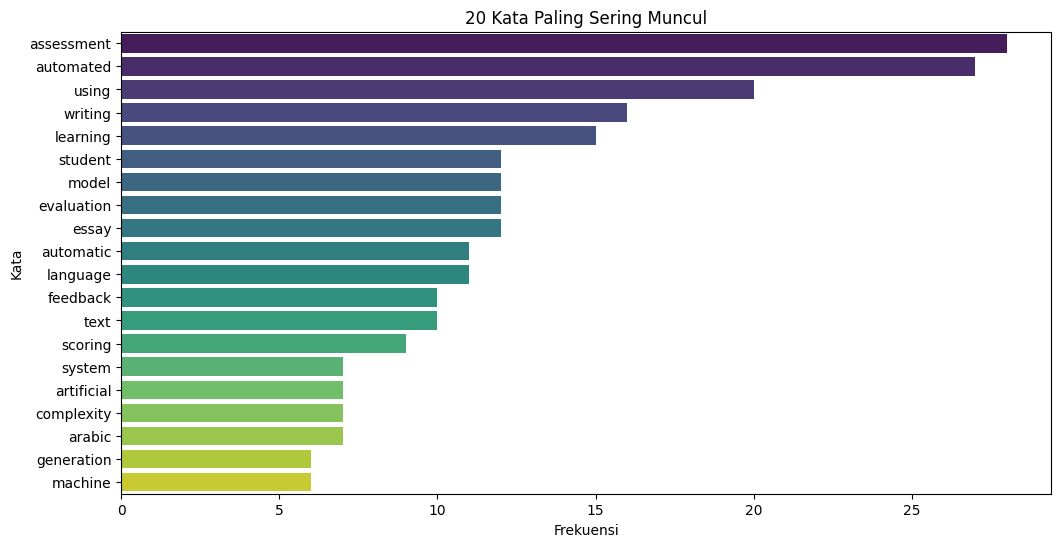


Total Dokumen: 213
5 Kata Paling Sering Muncul: ['assessment', 'automated', 'using', 'writing', 'learning']
5 Kata dengan Bobot TF-IDF Tertinggi: [('automated', 6.303665432321537), ('assessment', 6.149281287102852), ('using', 4.38043944433707), ('writing', 4.110600203363698), ('text', 3.582476864852483)]


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Langkah 1: Import Counter dari collections
from collections import Counter

# Langkah 2: Menggabungkan semua token dari semua dokumen
frekuensi_kata = [token for sublist in df['lemmatized'] for token in sublist]

# Langkah 3: Menghitung frekuensi setiap kata
word_frequencies = Counter(frekuensi_kata)

# Langkah 4: Mengurutkan frekuensi kata dari terbesar ke terkecil
sorted_frequencies = word_frequencies.most_common(20)

# Ekstrak kata dan frekuensinya
words, freqs = zip(*sorted_frequencies)

# Langkah 6: Visualisasi data
plt.figure(figsize=(12,6))
sns.barplot(x=list(freqs), y=list(words), palette='viridis')
plt.xlabel("Frekuensi")
plt.ylabel("Kata")
plt.title("20 Kata Paling Sering Muncul")
plt.show()

# Menampilkan informasi tambahan
total_dokumen = len(df)
most_common_words = [word for word, freq in sorted_frequencies[:5]]

# Menghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([" ".join(sublist) for sublist in df['lemmatized']])
tfidf_scores = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_matrix.sum(axis=0).A1))
sorted_tfidf = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:5]


print()
print(f"Total Dokumen: {total_dokumen}")
print(f"5 Kata Paling Sering Muncul: {most_common_words}")
print(f"5 Kata dengan Bobot TF-IDF Tertinggi: {sorted_tfidf}")


In [43]:
pip install spacy

In [49]:
import spacy
import pandas as pd
from collections import Counter

# Pastikan model bahasa spaCy telah diunduh (misalnya, "en_core_web_sm" untuk bahasa Inggris)
nlp = spacy.load("en_core_web_sm")

# Langkah 1: Menggabungkan semua teks menjadi satu dokumen
text_corpus = " ".join([" ".join(tokens) for tokens in df['lemmatized']])

# Langkah 2: Proses NER dengan spaCy
doc = nlp(text_corpus)

# Langkah 3: Mengambil entitas yang dikenali
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Langkah 4: Menghitung frekuensi entitas
entity_counts = Counter(entities)

# Langkah 5: Mengurutkan entitas berdasarkan frekuensi
sorted_entities = entity_counts.most_common(10)

# Menampilkan hasil
print("10 Entitas Paling Umum:")
for entity, freq in sorted_entities:
    print(f"{entity[0]} ({entity[1]}): {freq} kali")

10 Entitas Paling Umum:
arabic (NORP): 6 kali
english (LANGUAGE): 2 kali
second (ORDINAL): 2 kali
kilometer (CARDINAL): 1 kali
carcinoma multicenter (ORG): 1 kali
stroma (PRODUCT): 1 kali
aes (ORG): 1 kali
arabic (LANGUAGE): 1 kali
english (NORP): 1 kali
four (CARDINAL): 1 kali
